In [67]:
import pandas as pd
import icecream as ic
import seaborn as sns
import matplotlib.pyplot as plt
from dataclasses import dataclass
import os
import provider_lists

In [2]:
@dataclass
class Data:
    path_i: str
    
    #initially from helper() 
    # df : pandas.core.frame.DataFrame 

    df_cleaned: pd.core.frame.DataFrame
    dates_to_query : list #list of strings
    beg_date : str
    end_date : str
    df_to_analyze: pd.core.frame.DataFrame

    beg_year : str
    end_year : str
    fxn_list: list
    holidays : bool = True
    weekends : bool = False
    minor_holidays: bool = True

In [3]:
def get_thanksgiving_date(year):
    # Calculate Thanksgiving as the fourth Thursday in November
    thanksgiving_date = pd.to_datetime(f'{year}-11-01')
    thanksgiving_date += pd.DateOffset(weekday=3)  # Move to first Thursday
    thanksgiving_date += pd.DateOffset(weeks=3)   # Move to fourth Thursday
    return thanksgiving_date


def get_thanksgiving_after_date(year):
    # Calculate Thanksgiving Eve as the day before Thanksgiving
    thanksgiving_date = get_thanksgiving_date(year)
    thanksgiving_eve_date = thanksgiving_date + pd.DateOffset(days=1)
    return thanksgiving_eve_date


def get_christmas_eve_date(year):
    # Add year to 12-24
    return pd.to_datetime(f'{year}-12-24')


def get_christmas_date(year):
    # Add year to 12-25
    return pd.to_datetime(f'{year}-12-25')


def get_new_years_eve_date(year):
    return pd.to_datetime(f'{year}-12-31')


def get_new_years_date(year):
    # returns the NEXT year
    return pd.to_datetime(f'{year+1}-01-01')


def get_mothers_day_date(year):
    # Calculate Mother's Day as the second Sunday in May
    mothers_day_date = pd.to_datetime(f'{year}-05-01')
    mothers_day_date += pd.DateOffset(weekday=6)  # Move to first Sunday
    mothers_day_date += pd.DateOffset(weeks=1)   # Move to second Sunday
    return mothers_day_date


def get_halloween_date(year: int):
    return pd.to_datetime(f'{year}-10-31')

def get_memorial_day_date(year):
    # Calculate Memorial Day as the last Monday in May
    memorial_day_date = pd.to_datetime(f'{year}-05-01')
    memorial_day_date += pd.DateOffset(weekday=0)  # Move to the first day of May
    memorial_day_date += pd.DateOffset(weeks=3)    # Move to the fourth Monday
    memorial_day_date += pd.DateOffset(weeks=1)    # Move to the last Monday
    return memorial_day_date

def get_july_4(year):
    return pd.to_datetime(f'{year}-07-04')


major_holiday_fxns = [
    get_thanksgiving_date,
    get_thanksgiving_after_date,
    get_christmas_eve_date,
    get_christmas_date,
    get_new_years_eve_date,
    get_new_years_date,
]

minor_holiday_fxns = [
    get_mothers_day_date,
    get_halloween_date,
    get_memorial_day_date,
    get_july_4,

]

def get_initial_df():
    df = pd.read_excel(Data.path_i, header=1)
    return df

def collect_h_fxns(minor_h:bool):

    # minor_h = data.Data.minor_holidays

    if minor_h:
        return major_holiday_fxns + minor_holiday_fxns
    else:
        return major_holiday_fxns


def return_path():

    # inp1 = input(f"Please input location path of group shift stats: ")

    inp1 = r"C:\Users\Angel\Downloads\group_stats_detailed_152748_rsxaj713b9.xlsx"

    path1 = os.path.abspath(inp1.strip(' "'))
    return fr"{path1}"



In [4]:
def get_list_dates(fxn_list)->list:

    # get the range from data


    # get 2 years if there's no change in beg_date/end_date
    start_date = pd.to_datetime(Data.beg_date)
    end_date = pd.to_datetime(Data.end_date)

    years = [start_date.year,
             end_date.year]
    
    # date_range = pd.date_range(start_date, end_date)
    # date_list = pd.to_datetime(data.Data.dates_to_query)
    # mask = date_list.isin(date_range)
    # d = date_list[mask]
# 
    # datelist_within_range = []
    # for fxn in fxn_list:
    #     for year in years:
    #         datelist_within_range.append(fxn(year).strftime("%Y-%m-%d"))

    datelist = []  # list of pd.datetimes
    for fxn in fxn_list:
        for year in years:
            datelist.append(fxn(year))

    # Use a list comprehension to filter datetime objects within the date range
    # datelist_within_range = [date for date in datelist if start_date <= date <= end_date]
    
    return sorted(datelist)  

def if_all_holidays():
    # Gives a list of date strings if minorholidays:
    fxn_list = collect_h_fxns(minor_h=True)
    return get_list_dates(fxn_list)

def if_major_holidays():
    # then only give major holidays
    fxn_list = collect_h_fxns(minor_h=False)
    return get_list_dates(fxn_list)
def get_datelist_asstring():
    # default should be whole list?
    # list of holiday or weekend dates to put use with df.query()

    
    # if data.Data.Weekends:
    #     pass
    
    if Data.minor_holidays == True:
        Data.dates_to_query = if_all_holidays()
    
    else:
        Data.dates_to_query = if_major_holidays()

def count(df)->pd.Series:
    # helper.get_datelist_asstring()
    df_b = (
        df.sort_values(by="Provider")
        .reset_index(drop=True)
        .Provider.value_counts()
    )
    return df_b

In [5]:
Data.path_i = return_path()
df = get_initial_df()
Data.beg_date = pd.to_datetime(f'{2022}-05-01')
Data.end_date = pd.to_datetime(f'{2023}-11-30')




In [6]:
Data.dates_to_query = get_datelist_asstring()
# there's a problem here for later

In [7]:
dates_to_query_all_holidays = if_all_holidays()

In [8]:
Data.dates_to_query = dates_to_query_all_holidays
Data.dates_to_query


[Timestamp('2022-05-08 00:00:00'),
 Timestamp('2022-05-30 00:00:00'),
 Timestamp('2022-07-04 00:00:00'),
 Timestamp('2022-10-31 00:00:00'),
 Timestamp('2022-11-24 00:00:00'),
 Timestamp('2022-11-25 00:00:00'),
 Timestamp('2022-12-24 00:00:00'),
 Timestamp('2022-12-25 00:00:00'),
 Timestamp('2022-12-31 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-05-14 00:00:00'),
 Timestamp('2023-05-29 00:00:00'),
 Timestamp('2023-07-04 00:00:00'),
 Timestamp('2023-10-31 00:00:00'),
 Timestamp('2023-11-23 00:00:00'),
 Timestamp('2023-11-24 00:00:00'),
 Timestamp('2023-12-24 00:00:00'),
 Timestamp('2023-12-25 00:00:00'),
 Timestamp('2023-12-31 00:00:00'),
 Timestamp('2024-01-01 00:00:00')]

In [9]:
def clean_df(df):
    df = df.query("not Date.isna()").reset_index(drop=True)
    df = df.rename(columns={"Work Hrs": "Work_hrs", "Sched Hrs": "Scheduled_hrs",})

    # change Date to datetime dtype
    df.Date = pd.to_datetime(df.Date)

    # Ensure df.Time is a str
    df["Time"] = df["Time"].astype(str)
    # Format Provider names to be title()
    df.Provider = df.Provider.str.title().astype(str)

    return df

def compile_rows_to_analyze(df0):
    datelist = Data.dates_to_query
    df = df0[df0.Date.isin(datelist)]
    return df

In [10]:
df = clean_df(df)

In [11]:
df.shape

(8584, 9)

In [12]:
Data.dates_to_query == None

False

In [13]:
Data.df_to_analyze = compile_rows_to_analyze(df)

In [14]:
df_all_hol = Data.df_to_analyze['Provider']
# df_all_hol = df_all_hol.value_counts(ascending=False).reset_index()
df_all = df_all_hol.reset_index(drop=True).value_counts()

new_docs = provider_lists.NEW_DOCS
df_all = df_all.drop(new_docs)



In [15]:
df_all.info

<bound method Series.info of Nelson Huang         13
Jason Klein          10
Joseph Tran           7
Sabrina Taylor        7
Anne Sinnott          7
Michael Tang          6
Eduardo Lacalle       6
Joseph Kim            5
Kyle Vanstone         5
William Halacoglu     5
Norlan Maltez         5
Lian Farino           5
John Jobes            4
Harold Woo            3
Patrick Noone         3
Franklin Alconcel     3
Angelo Kim            2
Irena Vitkovitsky     2
Donald Bennett        2
Krystal Ribeiro       2
Joshua Imakyure       2
Shuai Zhao            2
Waseya Cornell        2
Patrick Flaherty      2
Ashkan Morim          1
Steven Merrill        1
Elizabeth Chen        1
Joseph Lo             1
Kenneth Chang         1
Jefferson Bracey      1
Adam Berkovits        1
Daniel Gowhari        1
Heber Phillips        1
Name: Provider, dtype: int64>

In [22]:
df_all.shape

(33,)

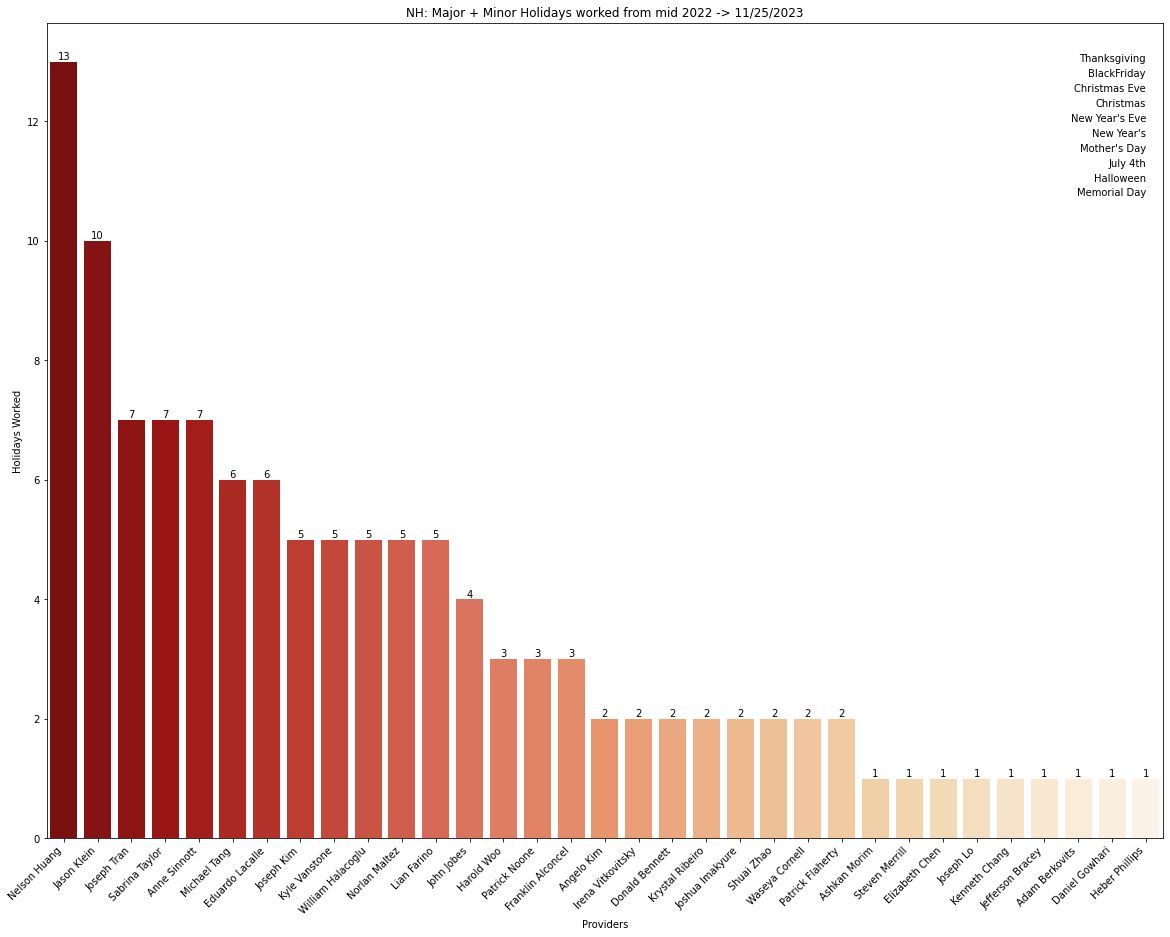

In [17]:
plt.figure(figsize=(20,15))

ax = sns.barplot(x=df_all.index, y=df_all.values, palette='OrRd_r')


for p, value in zip(ax.patches, df_all.values):
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

holiday_list = ["Thanksgiving", "BlackFriday", "Christmas Eve", "Christmas", "New Year's Eve", "New Year's", "Mother's Day", "July 4th", "Halloween", "Memorial Day"]

r_border = 1
t_border = 0
for holiday in holiday_list:
    plt.text(len(df_all)- r_border, max(df_all.values.flatten()) - t_border, holiday, fontsize=10, ha='right' )
    t_border += 0.25

plt.xticks(rotation = 45, ha='right')
plt.title('NH: Major + Minor Holidays worked from mid 2022 -> 11/25/2023')
plt.xlabel('Providers')
plt.ylabel('Holidays Worked')
plt.savefig("major+minor.jpg" ,dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [18]:
Data.dates_to_query = if_major_holidays()  
Data.dates_to_query

[Timestamp('2022-11-24 00:00:00'),
 Timestamp('2022-11-25 00:00:00'),
 Timestamp('2022-12-24 00:00:00'),
 Timestamp('2022-12-25 00:00:00'),
 Timestamp('2022-12-31 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-11-23 00:00:00'),
 Timestamp('2023-11-24 00:00:00'),
 Timestamp('2023-12-24 00:00:00'),
 Timestamp('2023-12-25 00:00:00'),
 Timestamp('2023-12-31 00:00:00'),
 Timestamp('2024-01-01 00:00:00')]

In [19]:
# # get_list_dates(major_holiday_fxns)

# major_holiday_dates = []  # list of pd.datetimes
# for year in [2022,2023]:
#     for fxn in major_holiday_fxns:
#         major_holiday_dates.append(fxn(year))

# major_holiday_dates

In [20]:
Data.df_to_analyze = compile_rows_to_analyze(df)

In [21]:
df_major = Data.df_to_analyze['Provider']
# df_all_hol = df_all_hol.value_counts(ascending=False).reset_index()
df_major = df_major.reset_index(drop=True).value_counts()

df_major = df_major.drop(new_docs)
df_major

KeyError: "['John Benjamin', 'Annie Au'] not found in axis"

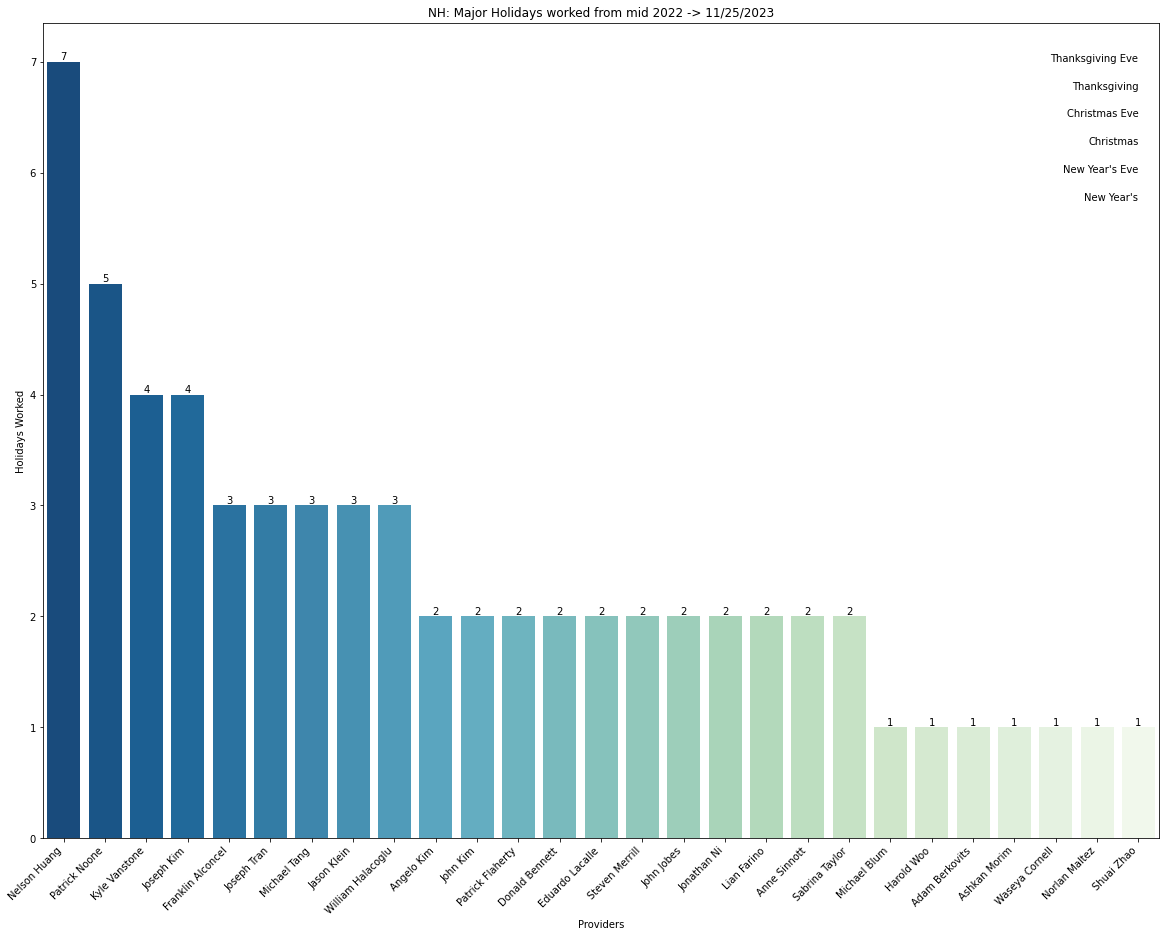

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.barplot(x=df_major.index, y=df_major.values, palette='GnBu_r')


for p, value in zip(ax.patches, df_major.values):
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xticks(rotation = 45, ha='right')
plt.title('NH: Major Holidays worked from mid 2022 -> 11/25/2023')
plt.xlabel('Providers')
plt.ylabel('Holidays Worked')

holiday_list = ["Thanksgiving Eve", "Thanksgiving", "Christmas Eve", "Christmas", "New Year's Eve", "New Year's",]

r_border = 1
t_border = 0
for holiday in holiday_list:
    plt.text(len(df_major)- r_border, max(df_major.values.flatten()) - t_border, holiday, fontsize=10, ha='right' )
    t_border += 0.25

plt.savefig("major.jpg" , bbox_inches='tight', pad_inches=0.1)
plt.show()